# Análisis interacciones

En seguida se realizará un análisis de las interacciones entre la IA y el humano. Los datos se descargan de dynamodb en formato csv.

In [1]:
import pandas as pd
import tiktoken

def get_num_tokens(string: str, encoding_name: str='cl100k_base') -> int:
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


In [2]:
interacciones_df = pd.read_csv('interacciones.csv')
interacciones_df['tokens'] = interacciones_df['text'].apply(lambda txt: get_num_tokens(txt))
interacciones_df

,id,session_id,datetime,sender,text,tokens
0,1efec97b-7686-493d-bdf0-9c3c1c35778a,D05J8ASFBL2,2023-07-21T20:01:31.677379,user,¿Cuanto me costaria un soat para una Nivus?,15
1,fe2254cd-3d27-400a-a85a-018fe724c14d,D05JXPM7DK2,2023-07-21T19:21:18.159311,ai,"""Hola, ¿en qué puedo ayudarte hoy?""",11
2,6af697d7-0374-428e-916b-c3c026eb57ce,d8d56e8f-bb15-4364-ae19-ba892ca09acc,2023-07-11T22:44:21.187296,user,Que beneficios flexibles hay,6
3,a4461223-c515-4b6a-8636-be59870a5815,1e9abe14-d160-408b-8120-3026e4b9609c,2023-07-17T21:29:30.851444,ai,"""Compensar es una entidad promotora de salud (...",112
4,2b4e58a6-c51f-4d9a-be21-a8613e5e7d73,D05H1M3HR5E,2023-07-19T04:52:59.717105,user,Tengo beneficios para mi mascota?,9
...,...,...,...,...,...,...
1723,97eccbda-8ea6-4cfa-9e1a-f4558583acbe,D05H1M3HR5E,2023-07-19T04:22:52.525053,ai,"""¡Claro! Para conocer tus beneficios de prepag...",81
1724,d11c02cc-a6b9-4b54-8861-b895f88c6630,c959e442-2cf6-44ed-882c-cc669d7b7640,2023-07-11T12:52:37.352364,user,Pregunta: Cuales son los beneficios fijos,12
1725,6eea4fe8-fe80-445b-b3cd-bcb761dacb27,D05H3FWP1EE,2023-07-26T15:03:58.410251,user,cual de los dos planes es mejor ?,9
1726,0df5d579-dc76-4e4e-b449-e3d67479e11f,8856d899-1b7b-4bd3-a2a2-74ca200874a4,2023-07-17T21:04:17.473019,ai,"""Los beneficios se pueden modificar en dos mom...",77


In [7]:
print('cantidad de conversaciones', len(interacciones_df['session_id'].unique()))

cantidad de conversaciones 186


Text(0, 0.5, 'Cantidad de conversaciones')

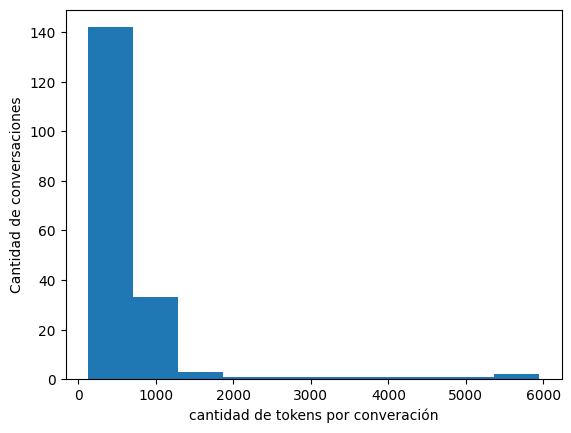

In [51]:
import matplotlib.pyplot as plt
interacciones_df.groupby(['session_id']).sum()['tokens'].plot.hist()
plt.xlabel('cantidad de tokens por converación')
plt.ylabel('Cantidad de conversaciones')

In [13]:
interacciones_df.groupby(['session_id']).sum()['tokens'].sort_values(ascending=False).head(15)

session_id
D05JLP4TSN5                             5944
D05JXPM7DK2                             5944
D05JH0Z2PAL                             5217
D05H1M3HR5E                             4638
D05H3FWP1EE                             4073
D05JLUTGW0Z                             3064
D05JLPDPY2D                             3028
4f6fd44c-8539-402d-ab81-9662ce9b84cc    1980
def973cd-9dc7-42f1-bd0d-9803e1b09e30    1444
D05J811TZ6X                             1442
1f7e1832-a8d8-4793-b383-4bdfa57bbe2a    1301
fd16ce6e-7c83-435e-9f16-da1eec3bbfce    1245
cc64fdbe-c801-48ba-9127-31a670ee2313    1195
D05JTPX4H8R                             1190
D05JAPS9RV2                             1181
Name: tokens, dtype: int64

In [14]:
# Tomemos la sesión 1
filtro = interacciones_df['session_id'] == 'D05JTPX4H8R'

interacciones_df[filtro].sort_values(by='datetime')

,id,session_id,datetime,sender,text,tokens
1247,96aa6c1f-a633-40a2-8dfa-7235ec7fc251,D05JTPX4H8R,2023-07-24T13:20:01.353043,system,"""Tu nombre es Linguo. Actúas como un asesor de...",115
1406,c7e0c24f-14a4-478d-9fe5-1432d39a2666,D05JTPX4H8R,2023-07-24T13:20:01.353043,user,"""hola, cómo estás? sabes que debo hacer si mi ...",29
947,d66633f5-1dc3-474a-a011-839b3df6db04,D05JTPX4H8R,2023-07-24T13:20:14.657582,ai,"""Hola, estoy aquí para ayudarte. Si tu tarjeta...",336
1316,9d2e785b-b919-40cc-8e93-8aa0176494ca,D05JTPX4H8R,2023-07-24T13:21:08.083857,user,"""son establecimientos aliados, pero los datafo...",34
1606,f1f39a43-ec55-4443-ab14-aa972c3cd911,D05JTPX4H8R,2023-07-24T13:21:22.014065,ai,"""Lamento escuchar que estás teniendo problemas...",352
1460,fdce84eb-bc16-4864-a41a-49b46890b751,D05JTPX4H8R,2023-07-24T13:22:30.427180,user,como puedo solicitar una nueva tarjeta sodexo ...,19
576,f4b63893-dc92-4d37-a0d0-536873af7248,D05JTPX4H8R,2023-07-24T13:22:41.129298,ai,"""Si necesitas solicitar una nueva tarjeta Sode...",305


In [21]:
# eliminemos conversaciones con más de 2k tokens
interacciones_df_grouped = interacciones_df.groupby('session_id').sum()
filtro = interacciones_df_grouped['tokens'] < 2000
filtro_session_id = interacciones_df_grouped[filtro].index
interacciones_df_filtrado = interacciones_df[interacciones_df['session_id'].isin(filtro_session_id)]
# filtro = interacciones_df['session_id'] == 'D05JTPX4H8R'

In [26]:
# tomemos la mediana
tokens_media = interacciones_df_filtrado.groupby(['session_id']).sum()['tokens'].mean()
print(
    'Promedio de tokens por conversación (sin tener en cuenta el contexto)',
    tokens_media
)

Promedio de tokens por conversación (sin tener en cuenta el contexto) 481.4413407821229


In [36]:
filtro = interacciones_df_filtrado['sender'] != 'system'
interacciones_df_filtrado[filtro]

tokens_media_sin_system = interacciones_df_filtrado[filtro].groupby(['session_id']).sum()['tokens'].mean()
print(
    'Promedio de tokens por conversación (sin tener en cuenta el contexto, ni system)',
    tokens_media_sin_system
)

Promedio de tokens por conversación (sin tener en cuenta el contexto, ni system) 304.4189944134078


In [37]:
palabras_media_aprox = tokens_media_sin_system*4/3
palabras_media_aprox

405.8919925512104

In [47]:
filtro = interacciones_df_filtrado['sender'] == 'user'

envios_usuario_mean = interacciones_df_filtrado[filtro].groupby('session_id').count()['id'].mean()
print(
    'Cantidad de envíos de usuario en promedio por cada conversación:',
    envios_usuario_mean
)

# El valor 191 es la cantidad de tokens en promedio por documento (ver notebook get_embeddings.ipynb)
# Cada vez que un usuario envía un mns se procura enviar 4 documentos como contexto

tokens_por_contexto = 191 * envios_usuario_mean * 4
print(
    'Cantidad de tokens de contexto aprox:',
    tokens_por_contexto
)
    

Cantidad de envíos de usuario en promedio por cada conversación: 3.1620111731843576
Cantidad de tokens de contexto aprox: 2415.776536312849


In [48]:
print(
    'Cantidad de tokens promedio por conversación:',
    tokens_media + tokens_por_contexto
)

Cantidad de tokens promedio por conversación: 2897.217877094972


In [49]:
print(
    'precio conversación (sin tener en cuenta contexto)',
    (tokens_media + tokens_por_contexto) * 0.002 / 1000 * 4000
)

precio conversación (sin tener en cuenta contexto) 23.177743016759777
